In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from operator import attrgetter
sns.set_context('notebook')

# **2. Data Analysis - Business**

Setelah melakukan data cleaning, langkah selanjutnya kita akan melakukan Exploratory Data Analysis untuk mengetahui *performa bisnis* dan *customer behaviour* Olist Ecommerce.

In [2]:
data = pd.read_csv('../data/processed/master_data.csv', engine='pyarrow')

In [3]:
# Membuat salinan dari data utama
data_eda = data.copy()

# menambahkan kolom baru waktu dengan format tahun-bulan-tanggal, tahun-bulan, tahun, dan bulan 
data_eda['order_date'] = data_eda['order_purchase_timestamp'].dt.date
data_eda['order_month'] = data_eda['order_purchase_timestamp'].dt.to_period('M')
data_eda['year'] = data_eda['order_month'].dt.strftime('%Y')
data_eda['month'] = data_eda['order_month'].dt.strftime('%B')
data_eda['order_month'] = data_eda['order_month'].dt.strftime('%Y-%m')

In [4]:
#Membuat dataset 'data_eda_rev' untuk pengolahan data yang berhubungan dengan Revenue Olist (Pendapatan)

# Mengcopy dataset 'data_eda' dan menghapus data duplikat dengan order_id, order_purchase_timestamp, payment_sequential, dan 'payment_value' yang sama 
data_eda_rev = data_eda.drop_duplicates(subset=['order_id','order_purchase_timestamp','payment_sequential','payment_value'], keep='first')

# drop baris yang memiliki nilai canceled atau unavailable pada kolom order status 
data_eda_rev = data_eda_rev[~data_eda_rev['order_status'].isin(['canceled','unavailable'])]

## **2.1 Trend Order**

REVENUE (Jumlah Pendapatan)

In [5]:
dfRev = data_eda_rev[['order_month','payment_value']].groupby('order_month').sum().reset_index()

total_revenue = dfRev['payment_value'].sum()
average_revenue = dfRev['payment_value'].mean()

ORDER (Jumlah Transaksi)

In [6]:
dfOrd = data_eda[['order_month','order_id']].groupby('order_month').nunique().reset_index()

total_order = dfOrd['order_id'].sum()
average_order = dfOrd['order_id'].mean()

CUSTOMER (Jumlah Pelanggan)

In [7]:
dfCust = data_eda[['order_month','customer_unique_id']].groupby('order_month').nunique().reset_index()

total_customer = dfCust['customer_unique_id'].sum()
average_customer =dfCust['customer_unique_id'].mean()

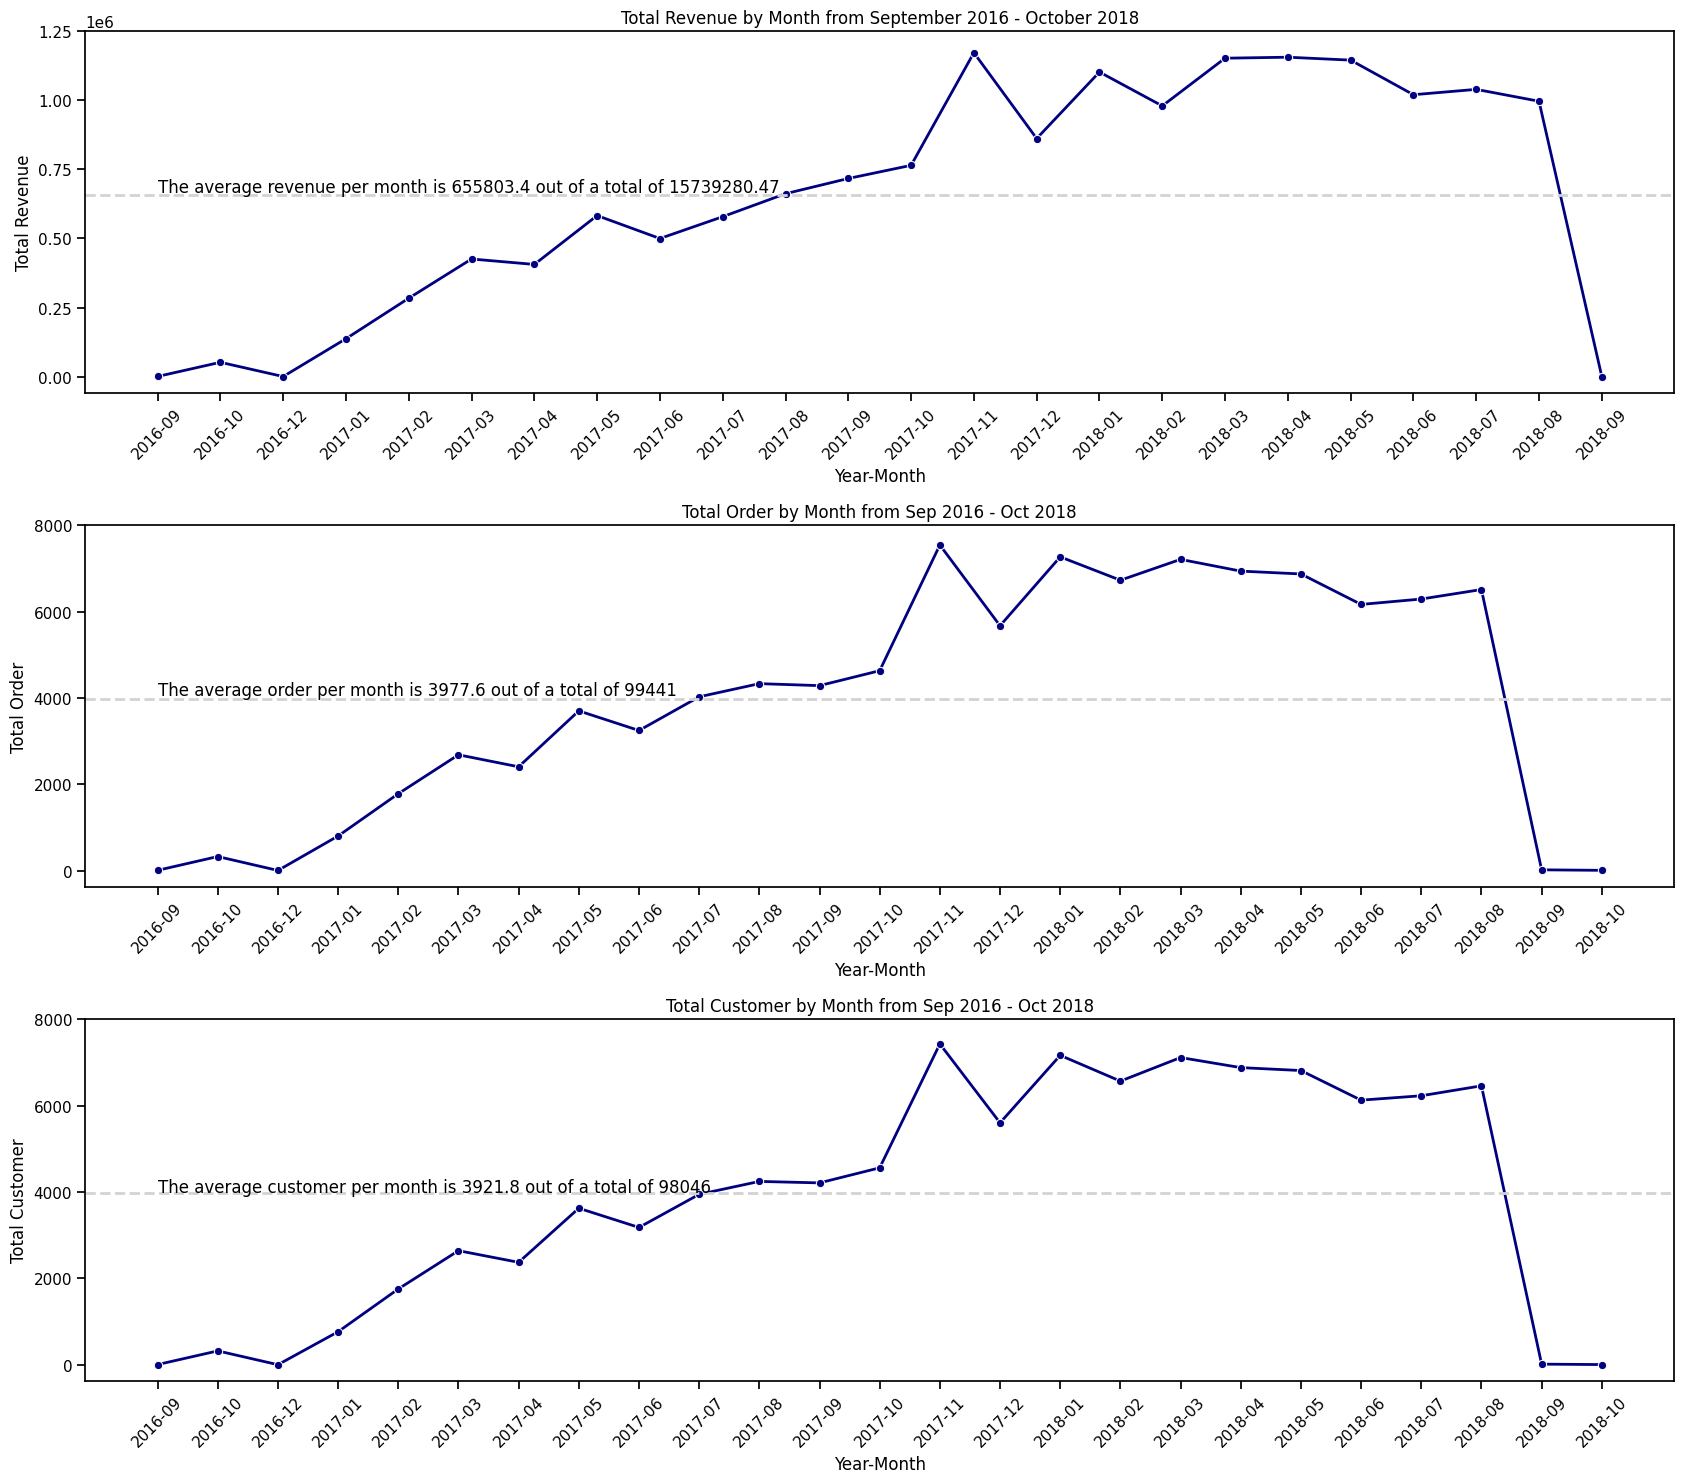

In [8]:
fig, axes = plt.subplots(3, 1, figsize=(17,15))

ax1=sns.lineplot(data=dfRev, x='order_month', y='payment_value', linewidth=2, ax=axes[0], color='navy', marker='o')
ax1.axhline(average_revenue, color='lightgrey', linestyle='--', linewidth=2)
ax1.set_title('Total Revenue by Month from September 2016 - October 2018')
ax1.text(0, average_revenue * 1.02, f'The average revenue per month is {average_revenue:0.1f} out of a total of {total_revenue}')
ax1.set_yticks(range(0,1500000,250000))
ax1.set_ylabel('Total Revenue')
ax1.set_xlabel('Year-Month')
ax1.tick_params(axis='x', labelrotation=45)

ax2=sns.lineplot(data=dfOrd, x='order_month', y='order_id', linewidth=2, ax=axes[1], color='navy', marker='o')
ax2.axhline(average_order, color='lightgrey', linestyle='--', linewidth=2)
ax2.set_title('Total Order by Month from Sep 2016 - Oct 2018')
ax2.text(0, average_order * 1.02, f'The average order per month is {average_order:0.1f} out of a total of {total_order}')
ax2.set_yticks(range(0,10000,2000))
ax2.set_ylabel('Total Order')
ax2.set_xlabel('Year-Month')
ax2.tick_params(axis='x', labelrotation=45)

ax3=sns.lineplot(data=dfCust, x='order_month', y='customer_unique_id', linewidth=2, ax=axes[2], color='navy', marker='o')
ax3.axhline(average_order, color='lightgrey', linestyle='--', linewidth=2)
ax3.set_title('Total Customer by Month from Sep 2016 - Oct 2018')
ax3.text(0, average_customer * 1.02, f'The average customer per month is {average_customer:0.1f} out of a total of {total_customer}')
ax3.set_yticks(range(0,10000,2000))
ax3.set_ylabel('Total Customer')
ax3.set_xlabel('Year-Month')
ax3.tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()

**Insights**:

* Berdasarkan grafik diatas, dapat dilihat bahwa jumlah pendapatan, jumlah transaksi, dan jumlah pelanggan memiliki pola kenaikan dan penurunan yang hampir sama untuk setiap bulannya, ini dikarenakan ketiga hal tersebut memiliki hubungan yang saling berbanding lurus terlepas dari perbedaan frekuensi transaksi pelanggan, transaksi berhasil atau tidak, perbedaan harga produk, dll. Secara umum, semakin banyak pelanggan di suatu perusahaan, semakin besar potensi untuk meningkatkan jumlah transaksi, dan semakin besar juga kemungkinan meningkatnya pendapatan yang diperoleh perusahaan. Begitu juga sebaliknya, saat jumlah pelanggan menjadi lebih sedikit, semakin sedikit juga jumlah transaksi, dan berdampak pada pendapatan perusahaan yang semakin berkurang.
* Jika dilihat lebih detail dari ketiga grafik tersebut, jumlah pelanggan, transaksi, dan pendapatan dari perusahaan Olist di tahun 2016 sangat rendah dibandingkan bulan-bulan setelahnya kecuali bulan September 2018 (akan ada analisis tersendiri). Hal ini dikarenakan pada tahun 2016 perusahaan Olist baru resmi hadir di pasar utama Brasil sehingga dapat diasumsikan pada periode bulan September hingga Desember 2016 belum terlalu banyak pelanggan yang melakukan transaksi di perusahaan Olist *[[Source]](https://olist.com/pt-br/sobre-nos/)*. 
* Pada tahun 2017, dari beberapa sumber yang diperoleh, perusahaan Olist memelopori model marketplace yang unik di Brasil dimana Olist melakukan perubahan dengan menyederhanakan kompleksitas operasional bisnis mereka, sehingga memungkinkan para pedagang dapat lebih mudah dan cepat dalam mengakses basis pelanggan yang sangat terfragmentasi di semua pasar Brasil *[[Source]](https://valorcapitalgroup.com/case-studies/olist-redesigned-the-marketplace-business-model-to-fit-the-realities-of-ecommerce-in-brazil/)*. Tentunya hal tersebut dapat meningkatkan jumlah pelangan yang bertransaksi di perusahaan Olist, yang dapat dibuktikan dengan jumlah pelanggan, transaksi, dan pendapatan yang cenderung meningkat di tahun 2017 berdasarkan ketiga grafik diatas, dengan capaian tertinggi terjadi pada bulan November 2017. Tingginya pelanggan yang melakukan transaksi dapat kita asumsikan karena adanya momen Black Friday pada bulan tersebut. Saat Black Friday, biasanya banyak toko baik online maupun offline yang menawarkan promo dan diskon besar-besaran *[[Source]](https://olist.com/blog/pt/como-vender-mais/inteligencia-competitiva/black-friday-brasil/)*.
* Sedangkan jumlah pelanggan, transaksi, dan pendapatan pada tahun 2018 cenderung stagnan, namun di bulan September dan Oktober terjadi penurunan secara signifikan, dimana dari data yang diperoleh hanya terdapat total 20 (16 orderan di bulan September dan 4 orderan di bulan Oktober) pemesanan dari kedua bulan tersebut. *(Catatan: tidak ada jumlah pendapatan Olist di bulan Oktober karena seluruh pemesanan yang masuk di bulan tersebut berstatus canceled, sehingga pembayaran dari pemesanan tersebut tidak termasuk ke dalam pendapatan perusahaan Olist)*. Dengan jumlah pemesanan pada kedua bulan yang sangat sedikit, dapat kita asumsikan jumlah data yang diperoleh pada kedua bulan tersebut belum lengkap. Untuk keperluan analisis selanjutnya data yang akan diolah adalah data dengan order_purcase_timestamp hingga bulan Agustus 2018, yang kemudian hal tersebut termasuk ke dalam batasan masalah.



In [9]:
data_eda= data_eda[~data_eda['order_month'].isin(['2018-09','2018-10'])]
data_eda_rev= data_eda_rev[~data_eda_rev['order_month'].isin(['2018-09','2018-10'])]

## **2.2 Sales berdasarkan State**


In [10]:
# buat data untuk analisis top revenue, order, dan jumlah customer berdasarkan state
dfRev = data_eda_rev.groupby('customer_state')['payment_value'].sum()
dfOrd = data_eda.groupby('customer_state')['order_id'].nunique()
dfCust = data_eda.groupby('customer_state')['customer_unique_id'].nunique()

dfState = pd.concat([dfRev,dfOrd,dfCust], axis=1).reset_index().rename(columns={"payment_value": "revenue", "order_id": "n_orders", "customer_unique_id": "n_customers", 'customer_state':'state'})
dfState

,state,revenue,n_orders,n_customers
0,Acre,19680.62,81,77
1,Alagoas,96252.70,413,401
2,Amapá,16262.80,68,67
3,Amazonas,27846.44,148,143
4,Bahia,607041.45,3380,3277
5,Ceará,274549.81,1336,1313
6,Distrito Federal,351487.63,2140,2075
7,Espírito Santo,323105.75,2033,1964
8,Goiás,340626.24,2020,1952
9,Maranhão,150691.70,747,726


In [11]:
state_revenue = dfState.sort_values('revenue', ascending=False)
state_transaction = dfState.sort_values('n_orders', ascending=False)
state_customers= dfState.sort_values('n_customers', ascending=False)

state_revenue['percentage'] = round(state_revenue['revenue'] * 100.0 / state_revenue['revenue'].sum(), 2)
state_transaction['percentage'] = round(state_transaction['n_orders'] * 100.0 / state_transaction['n_orders'].sum(), 2)
state_customers['percentage'] = round(state_customers['n_customers'] * 100.0 / state_customers['n_customers'].sum(), 2)


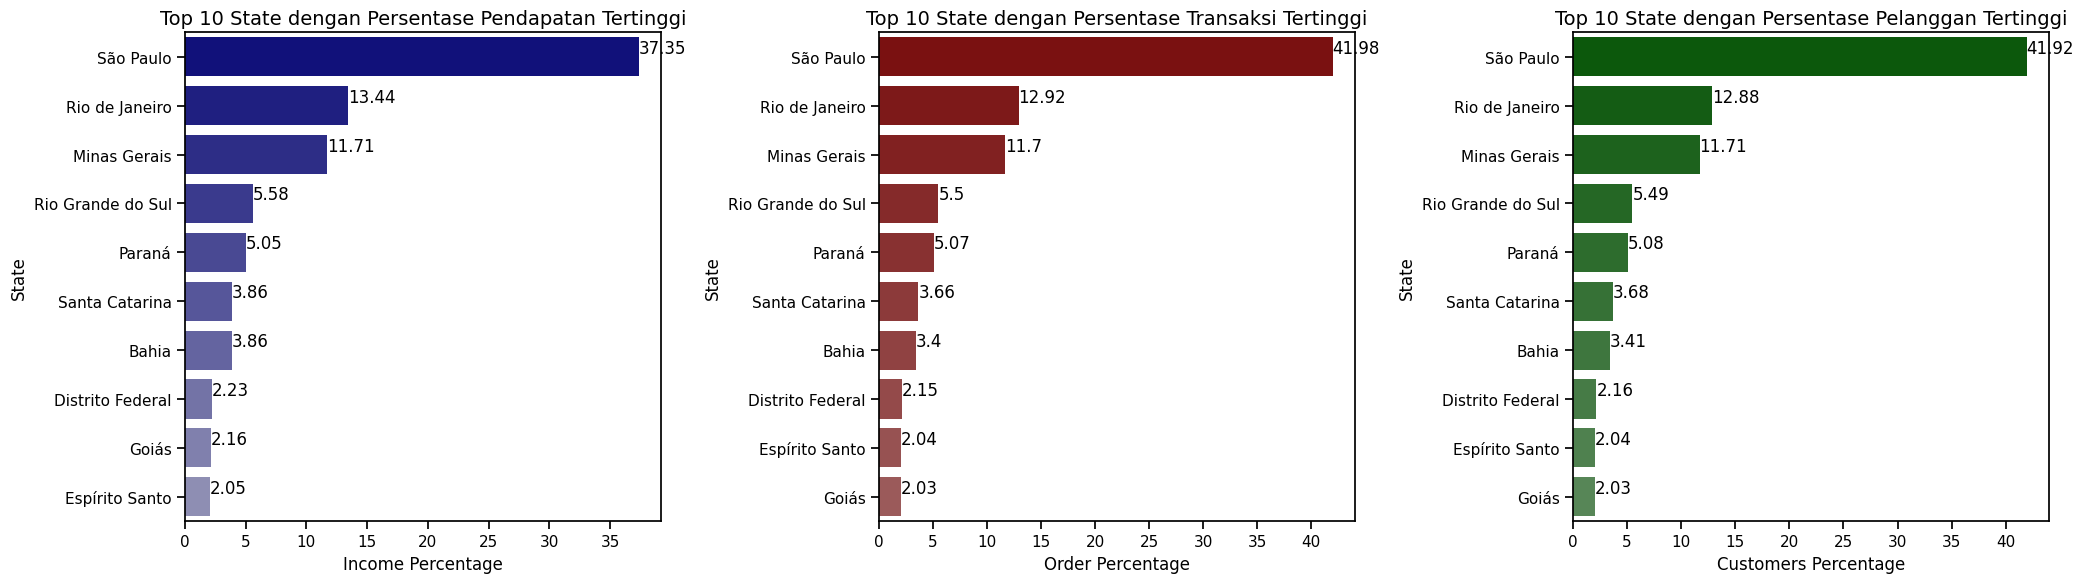

In [12]:
c1 = sns.blend_palette(['darkblue', 'lightgrey'], 15)
c2 = sns.blend_palette(['darkred', 'lightgrey'], 25)
c3 = sns.blend_palette(['darkgreen', 'lightgrey'], 25)

fig, axes = plt.subplots(1, 3, figsize=(21,6))

ax1 = sns.barplot(data=state_revenue.nlargest(10, columns='percentage'), y='state', x='percentage', ax=axes[0], palette=c1)
for p in ax1.patches:
    width = p.get_width()  # Nilai
    ax1.text(width, p.get_y() + p.get_height() / 2., f'{width}', va='bottom')
ax1.set_ylabel('State')
ax1.set_xlabel('Income Percentage')
ax1.set_title('Top 10 State dengan Persentase Pendapatan Tertinggi',fontsize=14)

ax2 = sns.barplot(data=state_transaction.nlargest(10, columns='percentage'), y='state', x='percentage', ax=axes[1], palette=c2)
for p in ax2.patches:
    width = p.get_width()  # Nilai
    ax2.text(width, p.get_y() + p.get_height() / 2., f'{width}', va='bottom')
ax2.set_ylabel('State')
ax2.set_xlabel('Order Percentage')
ax2.set_title('Top 10 State dengan Persentase Transaksi Tertinggi',fontsize=14)

ax3 = sns.barplot(data=state_customers.nlargest(10, columns='percentage'), y='state', x='percentage', ax=axes[2], palette=c3)
for p in ax3.patches:
    width = p.get_width()  # Nilai
    ax3.text(width, p.get_y() + p.get_height() / 2., f'{width}', va='bottom')
ax3.set_ylabel('State')
ax3.set_xlabel('Customers Percentage')
ax3.set_title('Top 10 State dengan Persentase Pelanggan Tertinggi',fontsize=14)

plt.tight_layout()
plt.show()

**Insights**:

* Berdasarkan grafik diatas, terhitung sejak bulan September 2016 - Agustus 2018, sekitar 37,35% dari total pendapatan, 41,98% dari total transaksi, serta 41,92% dari total pelanggan berasal dari Sao Paulo. Dengan demikian State Sao Paulo (SP) berkontribusi besar terhadap jumlah pendapatan, jumlah transaksi, dan jumlah pelanggan di perusahaan Olist. Berdasarkan domain knowlegde, hal tersebut cukup beralasan karena Sao Paulo merupakan state dengan populasi dan GDP terbanyak di Brazil *[[Source]](https://en.wikipedia.org/wiki/Federative_units_of_Brazil#List)*


## **2.3 Sales berdasarkan Produk**

In [13]:
# buat data untuk analisis top revenue, order, dan jumlah customer berdasarkan produk
dfRev = data_eda_rev.groupby('product_category_name_english')['payment_value'].sum()
dfOrd = data_eda.groupby('product_category_name_english')['order_id'].nunique()
dfCust = data_eda.groupby('product_category_name_english')['customer_unique_id'].nunique()

dfProd = pd.concat([dfRev,dfOrd,dfCust], axis=1).reset_index().rename(columns={"payment_value": "revenue", "order_id": "n_orders", "customer_unique_id": "n_customers", 'product_category_name_english':'product'})
dfProd

,product,revenue,n_orders,n_customers
0,agro_industry_and_commerce,78379.19,182,181
1,air_conditioning,61462.22,253,251
2,art,28234.75,202,202
3,arts_and_craftmanship,2204.07,23,21
4,audio,57250.40,350,349
...,...,...,...,...
67,stationery,275643.17,2311,2296
68,tablets_printing_image,9093.57,79,79
69,telephony,394906.58,4199,4152
70,toys,555753.03,3886,3844


In [14]:
product_revenue = dfProd.sort_values('revenue', ascending=False)
product_transaction = dfProd.sort_values('n_orders', ascending=False)
product_customers= dfProd.sort_values('n_customers', ascending=False)

product_revenue['percentage'] = round(product_revenue['revenue'] * 100.0 / product_revenue['revenue'].sum(), 2)
product_transaction['percentage'] = round(product_transaction['n_orders'] * 100.0 / product_transaction['n_orders'].sum(), 2)

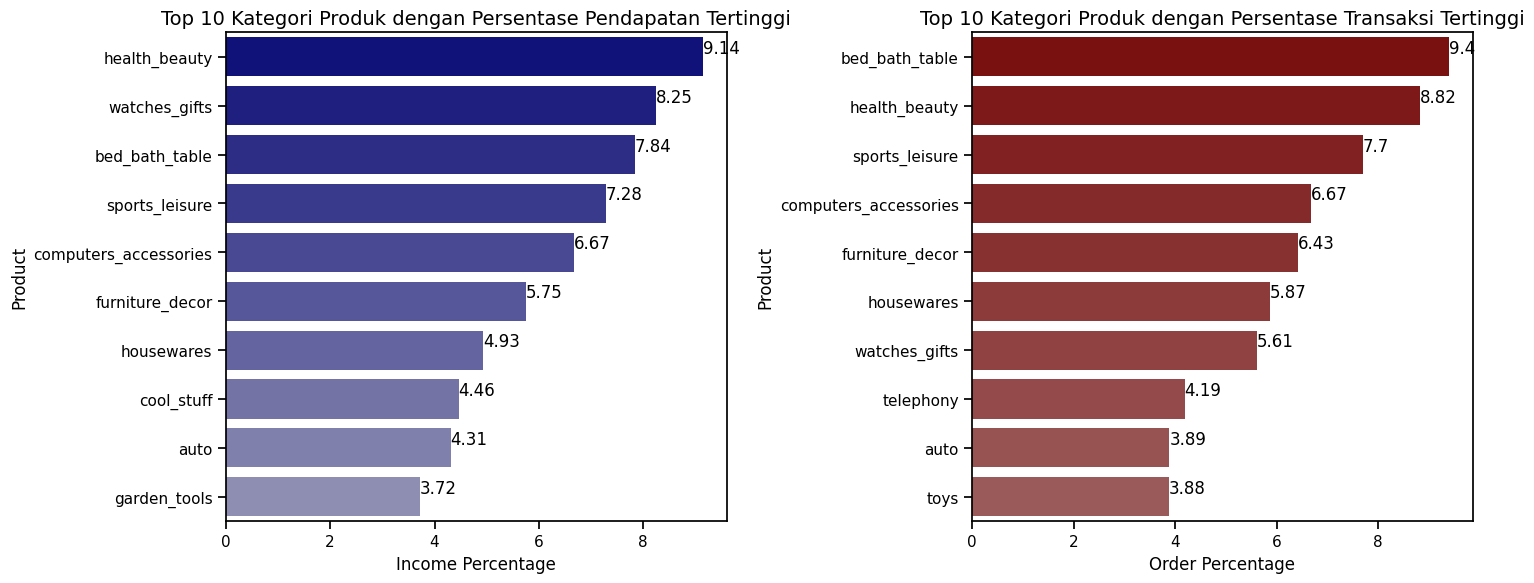

In [15]:
c1 = sns.blend_palette(['darkblue', 'lightgrey'], 15)
c2 = sns.blend_palette(['darkred', 'lightgrey'], 25)

fig, axes = plt.subplots(1, 2, figsize=(15,6))

ax1 = sns.barplot(data=product_revenue.nlargest(10, columns='percentage'), y='product', x='percentage', ax=axes[0], palette=c1)
for p in ax1.patches:
    width = p.get_width() 
    ax1.text(width, p.get_y() + p.get_height() / 2., f'{width}', va='bottom')
ax1.set_ylabel('Product')
ax1.set_xlabel('Income Percentage')
ax1.set_title('Top 10 Kategori Produk dengan Persentase Pendapatan Tertinggi', fontsize=14)

ax2 = sns.barplot(data=product_transaction.nlargest(10, columns='percentage'), y='product', x='percentage', ax=axes[1], palette=c2)
for p in ax2.patches:
    width = p.get_width()  
    ax2.text(width, p.get_y() + p.get_height() / 2., f'{width}', va='bottom')
ax2.set_ylabel('Product')
ax2.set_xlabel('Order Percentage')
ax2.set_title('Top 10 Kategori Produk dengan Persentase Transaksi Tertinggi', fontsize=14)

plt.tight_layout()
plt.show()

**Insights**:

* Berdasarkan grafik diatas, terhitung sejak bulan September 2016 - Agustus 2018, sekitar 9,14% dari total pendapatan berasal dari kategori produk health_beauty, lalu diikuti oleh watches_gift sebesar 8,25%, dan bad_bath_table sebesar 7,84%. Dengan demikian kategori produk health_beauty berkontribusi besar terhadap jumlah pendapatan di perusahaan Olist
* Sekitar 9,4% dari total transaksi berasal dari kategori produk bed_bath_table, lalu diikuti oleh health_beauty sebesar 8,82% dan sport_leisure sebesar 7,7%. Dengan demikian kategori produk bed_bath_table berkontribusi besar terhadap jumlah transaksi di perusahaan Olist

## **2.4 Customer Behaviour**

### **2.4.1 Waktu Pembelian**

In [16]:
# buat fitur baru order_hour, day_of_week, dan day_name
data_eda['order_hour'] = data_eda['order_purchase_timestamp'].dt.strftime('%H').astype('int')
data_eda['day_of_week'] = data_eda['order_purchase_timestamp'].dt.day_of_week
data_eda['day_name'] = data_eda['day_of_week'].map({ 0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday' })

# buat dataset dfTime yang berisi waktu pembelian dan jumlah customer
dfTime = data_eda.drop_duplicates(subset='order_id').groupby(by=['order_hour','day_of_week','day_name'])['order_id'].nunique().reset_index()

# buat pivot table dari dfTime
timePur = dfTime.pivot_table(values='order_id', index='order_hour', columns=['day_of_week','day_name'],aggfunc='sum')

In [17]:
# buat fitur baru order_hour, day_of_week, dan day_name
data_eda['order_hour'] = data_eda['order_purchase_timestamp'].dt.strftime('%H').astype('int')
data_eda['day_of_week'] = data_eda['order_purchase_timestamp'].dt.day_of_week
data_eda['day_name'] = data_eda['day_of_week'].map({ 0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday' })

# buat dataset dfTime yang berisi waktu pembelian dan jumlah customer
dfTime = data_eda.drop_duplicates(subset='order_id').groupby(by=['order_hour','day_of_week','day_name'])['order_id'].nunique().reset_index()

# buat pivot table dari dfTime
timePur = dfTime.pivot_table(values='order_id', index='order_hour', columns=['day_of_week','day_name'],aggfunc='sum')

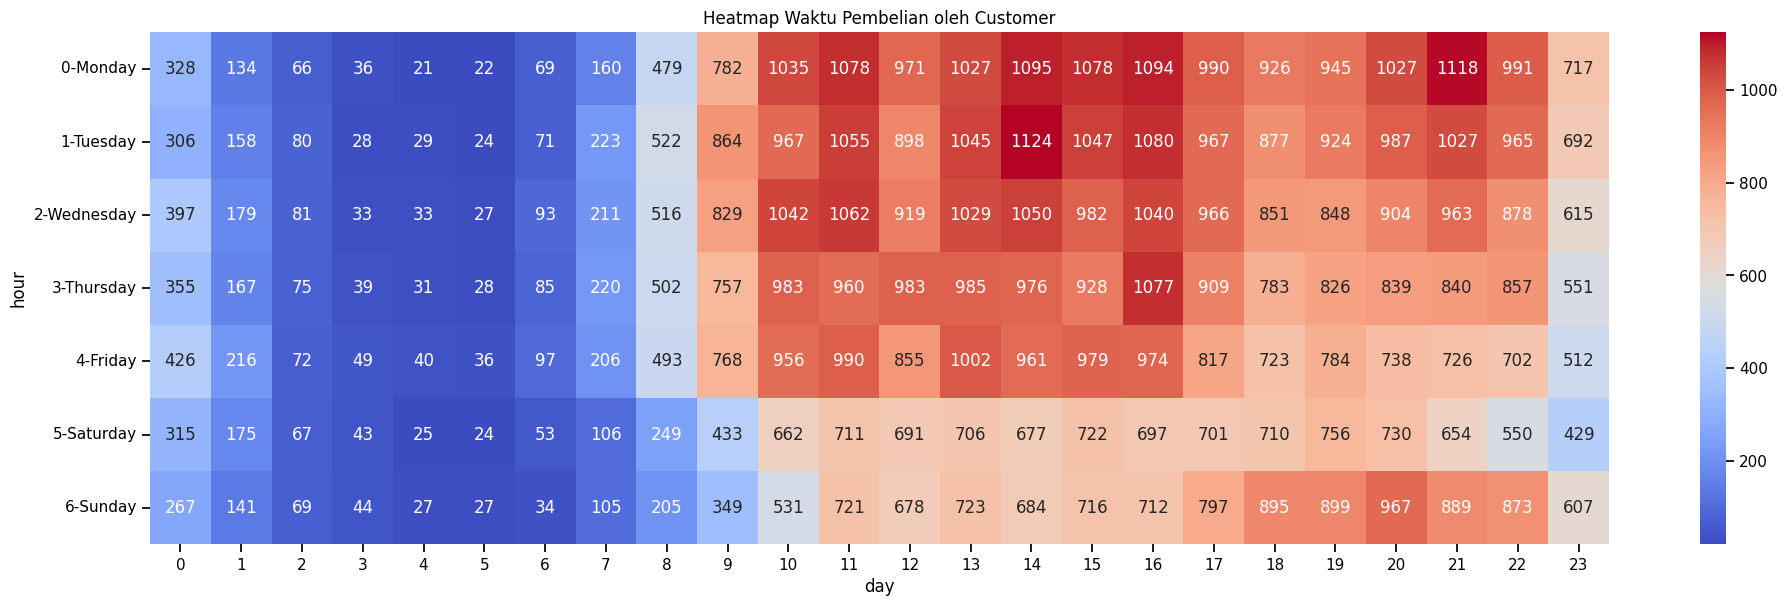

In [18]:
# buat visualisasi heatmap
plt.figure(figsize=(20,6))

sns.heatmap(timePur.T,
            annot=True,
            fmt='g',
            cmap='coolwarm',)

plt.tight_layout()
plt.xlabel('day')
plt.ylabel('hour')
plt.title('Heatmap Waktu Pembelian oleh Customer')
plt.show()

**Insights**:

* Berdasarkan heatmap diatas, customer olist paling banyak berbelanja pada hari senin dan selasa
* Secara umum, waktu yang paling diminati untuk berbelanja adalah dari jam 10 pagi sampai 10 malam


### **2.4.2 Tipe Pembayaran**

In [19]:
# buat data untuk analisis top order berdasrakan tipe pembayaran
dfPay = data_eda.groupby('payment_type')['order_id'].nunique()
dfPay = dfPay.sort_values(ascending=False).reset_index().rename(columns={'order_id': 'n_orders'})

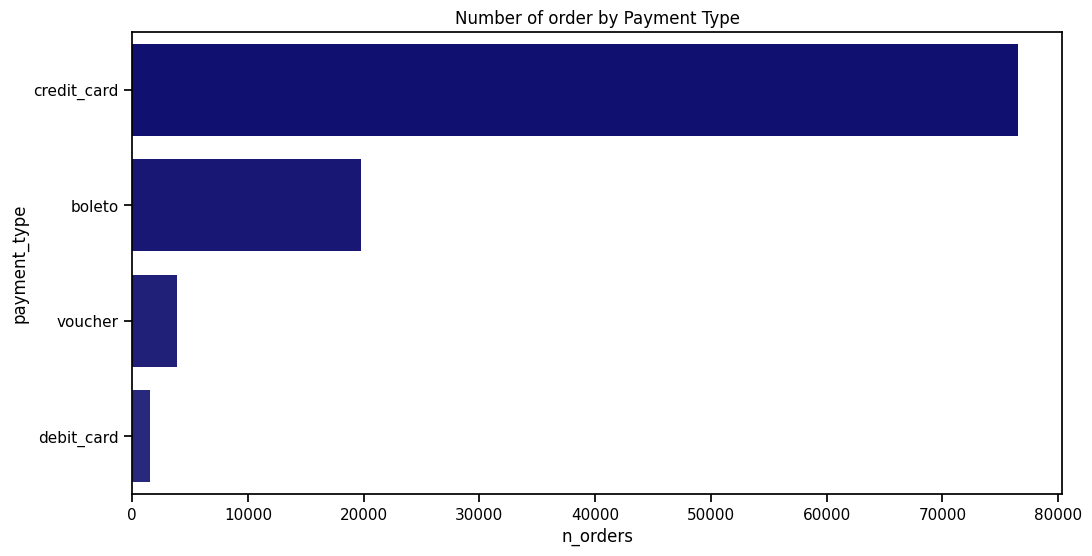

In [20]:
color_palette = sns.blend_palette(['navy', 'lightgrey'], 25)

# Visualisasi
plt.figure(figsize=(12,6))
sns.barplot(data=dfPay, x = 'n_orders', y='payment_type', palette=color_palette)
plt.title(f'Number of order by Payment Type')
plt.show()

**Insights**:

* Berdasarkan grafik diatas, pelanggan Olist lebih sering melakukan pembayaran menggunakan credit_card, kemudian disusul oleh boleto dan voucher


### **2.4.3 Installment**

In [21]:
data_eda['installment_type'] = data_eda['payment_installments'].apply(lambda x: 'Lunas' if x > 1 else 'Cicilan')

In [22]:
insType = data_eda.groupby('installment_type')['order_id'].nunique()
insType

installment_type
Cicilan    49043
Lunas      51170
Name: order_id, dtype: int64

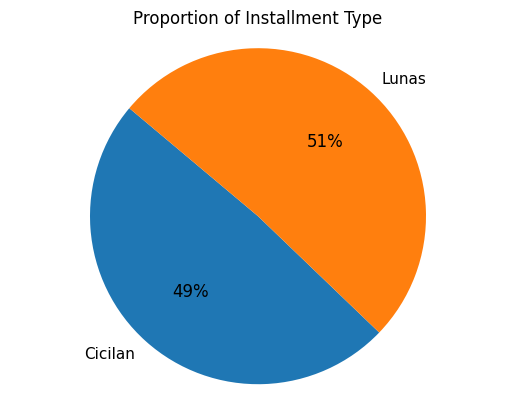

In [23]:
plt.pie(insType, labels=insType.index, autopct='%.0f%%', startangle=140)
plt.title('Proportion of Installment Type')
plt.axis('equal')  # Memastikan aspek lingkaran tetap
plt.show()

**Insights**:

* Berdasarkan grafik diatas, dapat dikatakan tidak ada perbedaan yang signifikan antara pelanggan yang melakukan pembayaran secara cicilan dan lunas


## **2.5 Customer Retention**

### **2.5.1 Retention Rate**

In [24]:
data_eda_cohort= data_eda.copy()
data_eda_cohort['order_month'] = data_eda_cohort['order_purchase_timestamp'].dt.to_period('M')
dfCohort = data_eda_cohort.drop_duplicates(subset='order_id', keep='first')[['customer_unique_id', 'order_month']]
dfCohort['cohort_month'] = dfCohort.groupby('customer_unique_id')['order_month'].transform('min')
dfCohort.head()

,customer_unique_id,order_month,cohort_month
0,b7d76e111c89f7ebf14761390f0f7d17,2016-09,2016-09
2,4854e9b3feff728c13ee5fc7d1547e92,2016-09,2016-09
3,009b0127b727ab0ba422f6d9604487c7,2016-09,2016-09
4,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09,2016-09
5,0eb1ee9dba87f5b36b4613a65074337c,2016-10,2016-10


In [25]:
# Number of distinct customer
dfCohort = dfCohort.groupby(['order_month','cohort_month'])\
            .agg(n_customers = ('customer_unique_id', 'nunique'))\
            .reset_index(drop=False)

# Period = current month - cohort month
dfCohort['period'] = (dfCohort['order_month'] - dfCohort['cohort_month']).apply(attrgetter('n'))

dfCohort.head()

,order_month,cohort_month,n_customers,period
0,2016-09,2016-09,4,0
1,2016-10,2016-10,321,0
2,2016-12,2016-12,1,0
3,2017-01,2016-12,1,1
4,2017-01,2017-01,764,0


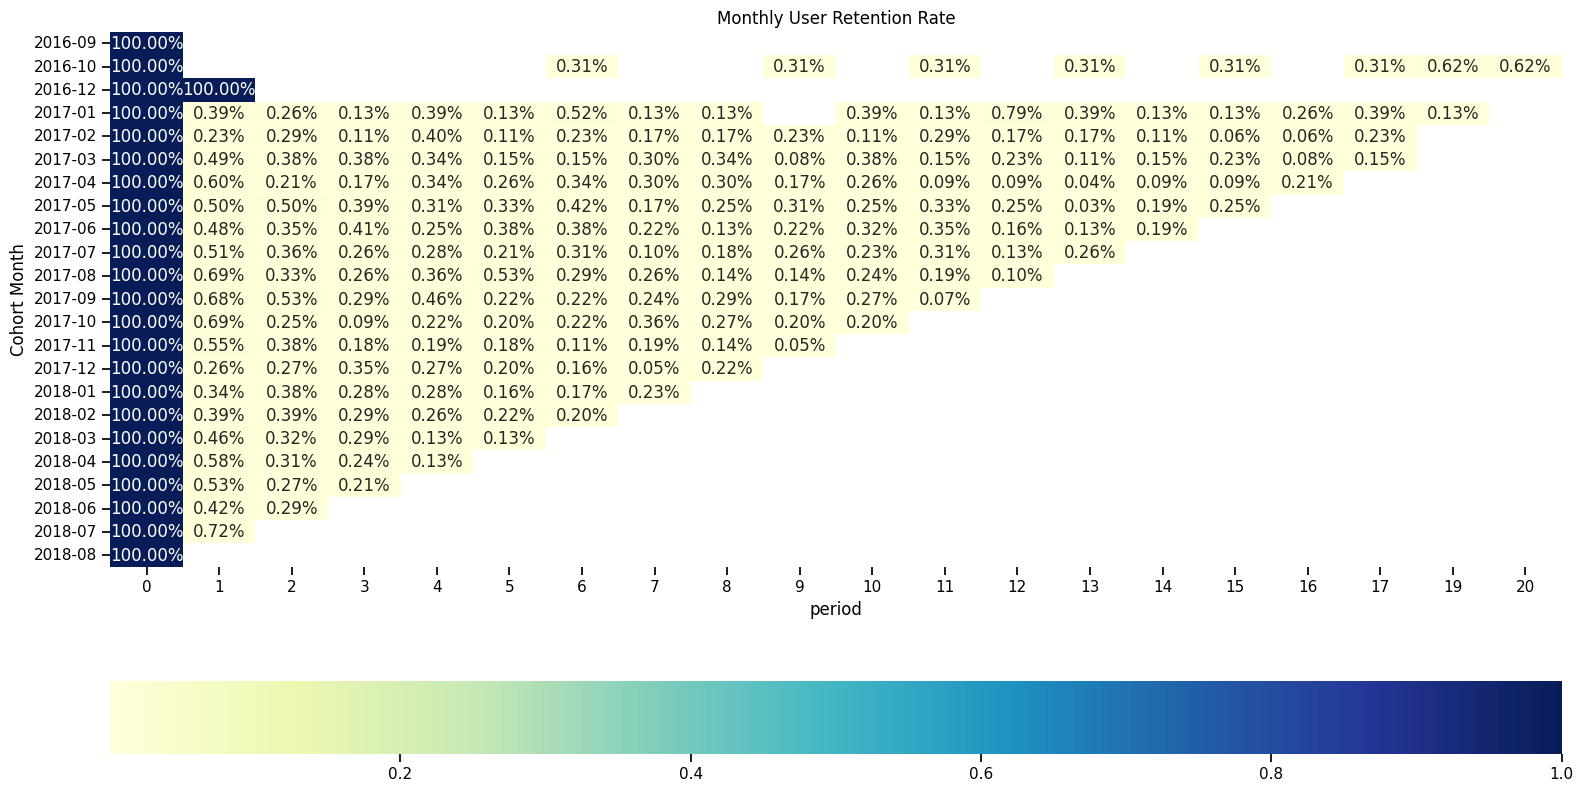

In [26]:
# Pivot Cohort
pivot_cohort = dfCohort.pivot_table(index='cohort_month', columns='period', values='n_customers')
pivot_cohort = pivot_cohort.divide(pivot_cohort[0], axis=0)

plt.figure(figsize=(16,8))
sns.heatmap(pivot_cohort,
            annot=True,
            fmt='.2%',
            cmap='YlGnBu',
            cbar_kws={'orientation':'horizontal'})
plt.tight_layout()
plt.xlabel('period')
plt.ylabel('Cohort Month')
plt.title('Monthly User Retention Rate')
plt.show()

**Insights**:

* Berdasarkan Cohort diatas, dapat dilihat bahwa secara umum retention rate konsumen sangat rendah, dimana pengguna baru yang melakukan transaksi berikutnya di bulan-bulan setelahnya tidak lebih dari 1%, yang menandakan hanya sedikit dari pengguna yang melakukan pembelian kembali



### **2.5.2 Customer**

In [27]:
dfOrd = data_eda.groupby('customer_unique_id')['order_id'].nunique().reset_index().rename(columns={'order_id': 'n_orders'})
dfOrd['orders_remarks'] = dfOrd['n_orders'].apply(lambda x: '> 1 orders' if x > 1 else '1 order')
dfOrd.nlargest(5, columns='n_orders')

,customer_unique_id,n_orders,orders_remarks
52970,8d50f5eadf50201ccdcedfb9e2ac8455,17,> 1 orders
23470,3e43e6105506432c953e165fb2acf44c,9,> 1 orders
10352,1b6c7548a2a1f9037c1fd3ddfed95f33,7,> 1 orders
37795,6469f99c1f9dfae7733b25662e7f1782,7,> 1 orders
76076,ca77025e7201e3b30c44b472ff346268,7,> 1 orders


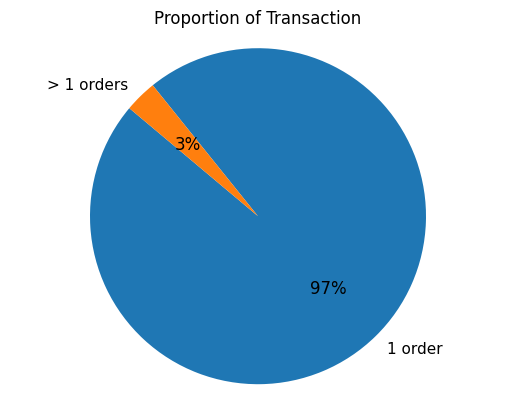

In [28]:
ordRem = dfOrd['orders_remarks'].value_counts()

plt.pie(ordRem, labels=ordRem.index, autopct='%.0f%%', startangle=140)
plt.title('Proportion of Transaction')
plt.axis('equal')  # Memastikan aspek lingkaran tetap
plt.show()

**Insights**:

* Berdasarkan grafik diatas, menambahkan analisis dari Cohort yang telah dibuat, jika dilihat dari proporsi transaksinya, hanya 3% dari total pelanggan Olist yang melakukan pemesanan lebih dari 1 kali